In [1]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics


In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


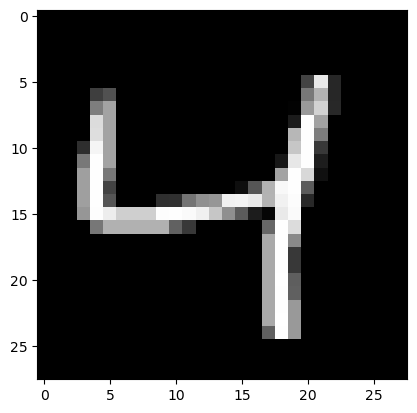

In [4]:
plt.imshow(x_train[2,:,:],cmap='gray')
plt.show()

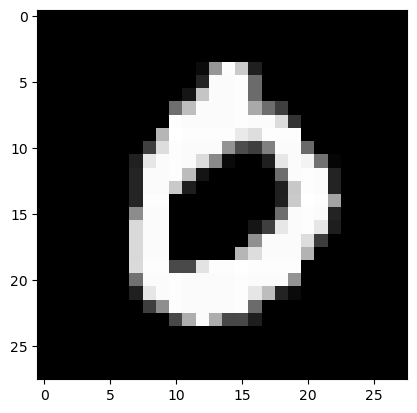

In [5]:
plt.imshow(x_test[3,:,:],cmap='gray')
plt.show()

In [6]:
print(y_train[2])

4


In [7]:
print(y_train[:50])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3]


In [8]:
L=pd.DataFrame(y_train)
print(L[0].value_counts())

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: 0, dtype: int64


In [9]:
# Reshape input data to have four dimensions
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [10]:
# Normalize input data.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [11]:
# Convert labels to one-hot vectors
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [34]:
# Creat a sequential model
model = Sequential()

# Deifne model architecture using convolutional and pooling layers
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

# Flatten output before passing it to final fully connected layer
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [35]:
# Compile model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [36]:
# Train model
model.fit(x_train, y_train, epochs=12, batch_size=256, verbose=1)

Epoch 1/12
235/235 [==============================] - 37s 136ms/step - loss: 0.3879 - accuracy: 0.8976
Epoch 2/12
235/235 [==============================] - 31s 134ms/step - loss: 0.0892 - accuracy: 0.9732
Epoch 3/12
235/235 [==============================] - 31s 134ms/step - loss: 0.0638 - accuracy: 0.9811
Epoch 4/12
235/235 [==============================] - 31s 134ms/step - loss: 0.0523 - accuracy: 0.9842
Epoch 5/12
235/235 [==============================] - 32s 135ms/step - loss: 0.0453 - accuracy: 0.9863
Epoch 6/12
235/235 [==============================] - 32s 136ms/step - loss: 0.0407 - accuracy: 0.9876
Epoch 7/12
235/235 [==============================] - 32s 136ms/step - loss: 0.0354 - accuracy: 0.9893
Epoch 8/12
235/235 [==============================] - 32s 136ms/step - loss: 0.0313 - accuracy: 0.9904
Epoch 9/12
235/235 [==============================] - 32s 136ms/step - loss: 0.0292 - accuracy: 0.9913
Epoch 10/12
235/235 [==============================] - 32s 137ms/step - l

In [38]:
# Evaluate the model on test size
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)
print('Loss: %.3f' % loss)

ValueError: in user code:

    File "C:\Users\STDC Tourism Counter\anaconda3\lib\site-packages\keras\engine\training.py", line 1852, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\STDC Tourism Counter\anaconda3\lib\site-packages\keras\engine\training.py", line 1836, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\STDC Tourism Counter\anaconda3\lib\site-packages\keras\engine\training.py", line 1824, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\STDC Tourism Counter\anaconda3\lib\site-packages\keras\engine\training.py", line 1790, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\STDC Tourism Counter\anaconda3\lib\site-packages\keras\engine\training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "C:\Users\STDC Tourism Counter\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\STDC Tourism Counter\anaconda3\lib\site-packages\keras\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\STDC Tourism Counter\anaconda3\lib\site-packages\keras\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\STDC Tourism Counter\anaconda3\lib\site-packages\keras\losses.py", line 1984, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\STDC Tourism Counter\anaconda3\lib\site-packages\keras\backend.py", line 5559, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


In [40]:
# Evaluate the model on test size
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)
print('Loss: %.3f' % loss)

ValueError: in user code:

    File "C:\Users\STDC Tourism Counter\anaconda3\lib\site-packages\keras\engine\training.py", line 1852, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\STDC Tourism Counter\anaconda3\lib\site-packages\keras\engine\training.py", line 1836, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\STDC Tourism Counter\anaconda3\lib\site-packages\keras\engine\training.py", line 1824, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\STDC Tourism Counter\anaconda3\lib\site-packages\keras\engine\training.py", line 1790, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\STDC Tourism Counter\anaconda3\lib\site-packages\keras\engine\training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "C:\Users\STDC Tourism Counter\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\STDC Tourism Counter\anaconda3\lib\site-packages\keras\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\STDC Tourism Counter\anaconda3\lib\site-packages\keras\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\STDC Tourism Counter\anaconda3\lib\site-packages\keras\losses.py", line 1984, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\STDC Tourism Counter\anaconda3\lib\site-packages\keras\backend.py", line 5559, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


In [26]:
# predict labels for test size
y_predict = model.predict(x_test)

313/313 [==============================] - 6s 7ms/step


In [27]:
y_predict[3]

array([9.9983704e-01, 4.8730148e-11, 6.1147665e-07, 2.9041518e-09,
       6.8469097e-10, 2.8948680e-08, 1.6188843e-04, 1.1838057e-08,
       3.2381664e-07, 1.0888504e-07], dtype=float32)

In [28]:
np.argmax(y_predict[3])

0

In [29]:
# Convert y_test from multilabel-indicator to multiclass
y_test = np.argmax(y_test, axis=1)

# Convert y_pred from multilabel-indicator to multiclass
y_pred = np.argmax(y_predict, axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [30]:
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.98      1.00      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.99      0.98       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

